In [1]:
import numpy as np
import time
import pickle
import os
import sys
import matplotlib.pyplot as pl
import importlib
import csv
import numpy as np
import matplotlib.pyplot as plt

from pymatching import Matching
#m = Matching(H)

#import entanglement
#import U_1_entanglement

from qiskit import *
from qiskit import extensions
from qiskit import QuantumCircuit
import qiskit
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import random_unitary, Statevector, DensityMatrix, entropy, partial_trace
from qiskit.result import marginal_counts

import os
import sys
import fileinput
from numpy import inf
from numpy import float 


from qecsim.model import Decoder, cli_description
from qecsim.model import DecoderFTP
from qecsim.models.rotatedplanar import RotatedPlanarCode
from qecsim.models.toric import ToricCode
import math

import qecsim
from qecsim import paulitools as pt
from qecsim.models.generic import DepolarizingErrorModel
from qecsim.models.rotatedplanar import RotatedPlanarCode

from enum import Enum
from copy import deepcopy
import numpy as np
import inspect
import copy
import networkx as nx
import matplotlib.pyplot as plt


qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
[[0, 1], [1, 2], [2, 0], [0, 3], [1, 4], [2, 5], [3, 4], [4, 5], [5, 3], [3, 6], [4, 7], [5, 8], [6, 7], [7, 8], [8, 6], [6, 0], [7, 1], [8, 2]]


/Users/hosseindehghani/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


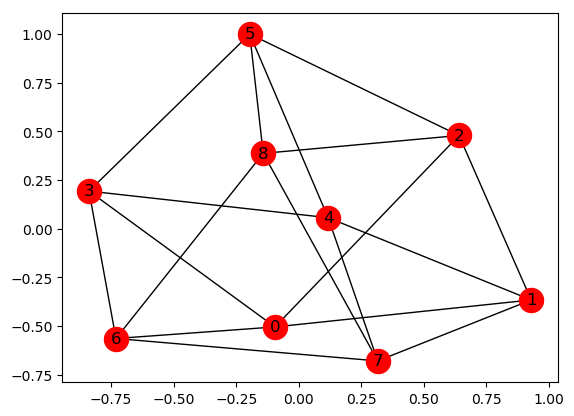

logical =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}


In [2]:
class GraphVisualization:
   
    def __init__(self):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
        self.visual = []
          
    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
          
    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()
        
        
def squareGraph(Nq):
    # Nq: Number of qubits/qubits on a square lattice
    # L: Size of the square side. We have a L*L lattice and 
    # there are Nq=2*L^2 qubits/qubits/
    L = int(np.sqrt(Nq/2))
    #print("L = ", L)
    qubits = []
    for j in range(L):
        for half in range(0, 2):
            for i in range(L):
                if half==0:
                    iplus1 = (i+1)%(L)
                    qubits.append([2*j*L+i, 2*j*L+iplus1])
                if half==1:
                    nextrow = ((2*j+3)*L)%(2 * L**2)
                    qubits.append([(2*j+1)*L+i, nextrow+i])
    
    print("qubits = ", qubits)

    edges = []    
    for j in range(L):
        for i in range(L):
            iplus1 = (i+1)%(L)
            edges.append([j*L+i, j*L+iplus1])
        for i in range(L):            
            nextrow = ((j+1)*L)%(L**2)
            edges.append([j*L+i, nextrow+i])
            
    
    logicals = [];
    #X1:
    X1arr=[];X2arr=[];
    Z1arr=[];Z2arr=[];    
    
    for j in range(0, L):
        X1arr.append(2*j*L)
        #print(edges)
        X2arr.append(L+j)
        Z1arr.append(L+2*j*L)
        Z2arr.append(j)        
    """
    for i in X1arr:
        print("X1arr = ", edges[i][:])        
    for i in X2arr:
        print("X2arr = ", edges[i][:])
    for i in Z1arr:
        print("Z1arr = ", edges[i][:])
    for i in Z2arr:
        print("Z2arr = ", edges[i][:])
    """    

    logical = dict();logical = {"X1":X1arr, \
        "X2":X2arr, "Z1":Z1arr,\
        "Z2":Z2arr}        
    
    return edges, logical

G = GraphVisualization()
edges, logical = squareGraph(18);
print(edges)
#print(logical)
numEdges = np.shape(edges)[0]
for e in range(numEdges):
    #print(edgesHoney[e])
    G.addEdge(edges[e][0], edges[e][1])
G.visualize()  
print("logical = ", logical)

In [3]:
def honeycombGraph(Nq):
    if Nq==24:
        edges=[[0, 3],
            [1, 4],[2, 8],[5, 11],[6, 17],[7, 14],[9, 10], 6[12, 19],[13, 21],[15, 22],[16, 23],[18, 20],[0, 2],[1, 5],[3, 7],[4, 12],
            [6, 13],[8, 14],[9, 16],[10, 22],[11, 19],[15, 23],[17, 20],[18, 21],[0, 1],[2, 6],[3, 9],[4, 10], 
            [5, 13],[7, 18],[8, 15],[11, 23],[12, 20],[14, 19],[16, 21],[17, 22]];
    
    logical = dict();logical = {"X1":[23, 16, 12, 14], \
        "X2":[31, 28, 25, 30], "Z1":[21, 31, 3, 28, 16, 25, 2, 30],\
        "Z2":[29, 11, 22, 4, 25, 2, 17, 5]}
    #print("logical = ", logical)
    
    # p_1 p_2 t_1 t_2
    spacetimeedge = [[2, 1, 1, 3],[2, 1, 4, 6],[2, 1, 7, 9],[2, 1, 10, 12],[2, 1, 13, 15],[2, 1, 16, 18],[3, 1, 1, 3],[3, 1, 4, 6],[3, 1, 7, 9],[3, 1, 10, 12],[3, 1, 13, 15],[3, 1, 16, 18],[2, 5, 1, 3],[2, 5, 4, 6],[2, 5, 7, 9],[2, 5, 10, 12],[2, 5, 13, 15],[2, 5, 16, 18],[3, 6, 1, 3],[3, 6, 4, 6],[3, 6, 7, 9],[3, 6, 10, 12],[3, 6, 13, 15],[3, 6, 16, 18],[8, 1, 1, 3],[8, 1, 4, 6],[8, 1, 7, 9],[8, 1, 10, 12],[8, 1, 13, 15],[8, 1, 16, 18],[2, 10, 1, 3],[2, 10, 4, 6],[2, 10, 7, 9],[2, 10, 10, 12],[2, 10, 13, 15],[2, 10, 16, 18],[11, 5, 1, 3],[11, 5, 4, 6],[11, 5, 7, 9],[11, 5, 10, 12],[11, 5, 13, 15],[11, 5, 16, 18],[11, 6, 1, 3],[11, 6, 4, 6],[11, 6, 7, 9],[11, 6, 10, 12],[11, 6, 13, 15],[11, 6, 16, 18],[3, 10, 1, 3],[3, 10, 4, 6],[3, 10, 7, 9],[3, 10, 10, 12],[3, 10, 13, 15],[3, 10, 16, 18],[11, 10, 1, 3],[11, 10, 4, 6],[11, 10, 7, 9],[11, 10, 10, 12],[11, 10, 13, 15],[11, 10, 16, 18],[8, 6, 1, 3],[8, 6, 4, 6],[8, 6, 7, 9],[8, 6, 10, 12],[8, 6, 13, 15],[8, 6, 16, 18],[8, 5, 1, 3],[8, 5, 4, 6],[8, 5, 7, 9],[8, 5, 10, 12],[8, 5, 13, 15],[8, 5, 16, 18],[0, 2, 2, 4],[0, 2, 5, 7],[0, 2, 8, 10],[0, 2, 11, 13],[0, 2, 14, 16],[0, 2, 17, 19],[0, 3, 2, 4],[0, 3, 5, 7],[0, 3, 8, 10],[0, 3, 11, 13],[0, 3, 14, 16],[0, 3, 17, 19],[4, 2, 2, 4],[4, 2, 5, 7],[4, 2, 8, 10],[4, 2, 11, 13],[4, 2, 14, 16],[4, 2, 17, 19],[7, 3, 2, 4],[7, 3, 5, 7],[7, 3, 8, 10],[7, 3, 11, 13],[7, 3, 14, 16],[7, 3, 17, 19],[4, 8, 2, 4],[4, 8, 5, 7],[4, 8, 8, 10],[4, 8, 11, 13],[4, 8, 14, 16],[4, 8, 17, 19],[9, 2, 2, 4],[9, 2, 5, 7],[9, 2, 8, 10],[9, 2, 11, 13],[9, 2, 14, 16],[9, 2, 17, 19],[0, 11, 2, 4],[0, 11, 5, 7],[0, 11, 8, 10],[0, 11, 11, 13],[0, 11, 14, 16],[0, 11, 17, 19],[9, 3, 2, 4],[9, 3, 5, 7],[9, 3, 8, 10],[9, 3, 11, 13],[9, 3, 14, 16],[9, 3, 17, 19],[7, 8, 2, 4],[7, 8, 5, 7],[7, 8, 8, 10],[7, 8, 11, 13],[7, 8, 14, 16],[7, 8, 17, 19],[4, 11, 2, 4],[4, 11, 5, 7],[4, 11, 8, 10],[4, 11, 11, 13],[4, 11, 14, 16],[4, 11, 17, 19],[7, 11, 2, 4],[7, 11, 5, 7],[7, 11, 8, 10],[7, 11, 11, 13],[7, 11, 14, 16],[7, 11, 17, 19],[9, 8, 2, 4],[9, 8, 5, 7],[9, 8, 8, 10],[9, 8, 11, 13],[9, 8, 14, 16],[9, 8, 17, 19],[1, 0, 0, 2],[1, 0, 3, 5],[1, 0, 6, 8],[1, 0, 9, 11],[1, 0, 12, 14],[1, 0, 15, 17],[1, 4, 0, 2],[1, 4, 3, 5],[1, 4, 6, 8],[1, 4, 9, 11],[1, 4, 12, 14],[1, 4, 15, 17],[5, 0, 0, 2],[5, 0, 3, 5],[5, 0, 6, 8],[5, 0, 9, 11],[5, 0, 12, 14],[5, 0, 15, 17],[6, 0, 0, 2],[6, 0, 3, 5],[6, 0, 6, 8],[6, 0, 9, 11],[6, 0, 12, 14],[6, 0, 15, 17],[1, 7, 0, 2],[1, 7, 3, 5],[1, 7, 6, 8],[1, 7, 9, 11],[1, 7, 12, 14],[1, 7, 15, 17],[5, 9, 0, 2],[5, 9, 3, 5],[5, 9, 6, 8],[5, 9, 9, 11],[5, 9, 12, 14],[5, 9, 15, 17],[10, 4, 0, 2],[10, 4, 3, 5],[10, 4, 6, 8],[10, 4, 9, 11],[10, 4, 12, 14],[10, 4, 15, 17],[10, 7, 0, 2],[10, 7, 3, 5],[10, 7, 6, 8],[10, 7, 9, 11],[10, 7, 12, 14],[10, 7, 15, 17],[6, 9, 0, 2],[6, 9, 3, 5],[6, 9, 6, 8],[6, 9, 9, 11],[6, 9, 12, 14],[6, 9, 15, 17],[10, 9, 0, 2],[10, 9, 3, 5],[10, 9, 6, 8],[10, 9, 9, 11],[10, 9, 12, 14],[10, 9, 15, 17],[5, 7, 0, 2],[5, 7, 3, 5],[5, 7, 6, 8],[5, 7, 9, 11],[5, 7, 12, 14],[5, 7, 15, 17],[6, 4, 0, 2],[6, 4, 3, 5],[6, 4, 6, 8],[6, 4, 9, 11],[6, 4, 12, 14],[6, 4, 15, 17]]
    
    return edges, logical

In [5]:
G = GraphVisualization()
edges, logical = honeycombGraph(24);
print("len logical = ", len(logical))
print(np.shape(edges))
numEdges = np.shape(edges)[0]
for e in range(numEdges):
    #print(edges[e])
    G.addEdge(edges[e][0], edges[e][1])
G.visualize()  

edges, logical = honeycombGraph(24);
for i in logical.keys():
    print(i, " = ", logical[i])

    
#logical["X1"].append(20)
#print(logical)
#logical["X1"].append(22)
#print(logical["X1"])
EdgeList =  [[0, 3], [1, 4], [2, 8], [5, 11], [6, 17], [7, 14], [9, 10], [12, 19], [13, 21], [15, 22], [16, 23], [18, 20], [0, 2], [1, 5], [3, 7], [4, 12], [6, 13], [8, 14], [9, 16], [10, 22], [11, 19], [15, 23], [17, 20], [18, 21], [0, 1], [2, 6], [3, 9], [4, 10], [5, 13], [7, 18], [8, 15], [11, 23], [12, 20], [14, 19], [16, 21], [17, 22]]

#print((EdgeList))
#for i in range(np.shape(EdgeList)[0]):
#    print("i = {}, Edge = {}".format(i, EdgeList[i][:]))


#for i in range(np.shape(EdgeList)[])    

TypeError: 'int' object is not subscriptable

In [6]:
#def FloquetCode(Nq, G, Nk, Graph="Honeycomb"):
#    # Nq: Number of qubits
    # G: Check matrix (2Nq, 2Nq) including the stabilizers (rows 1:Nq-k), 
    # destabilizers (rows Nq+1:2Nq-k) and logical operators (Z rows -> Nq-k+1:Nq,
    # X rows -> 2Nq-k+1:2Nq)
    

In [7]:
# Indices are in the format (lattice, row, column).
# Qubit sites (i.e. edges) are indexed with lattice=0 and lattice=1 \
# indicating horizontal and vertical edges, respectively, on the primal lattice.


# In our binary representation of the Pauli operators we take: Z=(1, 0),\
# X=(0, 1) and Y=(1, 1)

class Pauli:
    def __init__(self, nqbit=1):
        #print("coordinate[0] = ", coordinate)
        hilbsize = 2**n;
        return np.identity(hilbsize*nqbit);
        
        
    def Z(self):
        zmat = np.array([[1, 0], [0, -1]])
        return zmat
    def X(self):
        zmat = np.array([[0, 1], [1, 0]])
        return zmat
    def Y(self):
        zmat = np.array([[0, -j], [0, j]])
        return zmat
    
    def binaryRep(Zindex=[], Xindex=[]):
        # qbitIndex: qbits with Pauli index
        #print("Xindex = ", Xindex)
        nqbit = len(Zindex)
        #print("nqbit = ", nqbit)
        binarymat = np.zeros(2*nqbit)
        for i in range(nqbit):
            binarymat[2*i] = Zindex[i]
            binarymat[2*i+1] = Xindex[i]
        #print("binarymat = ", binarymat)
        return binarymat
            
    def symplecticProd(P1, P2):
        # The sign bit is removed.
        N = int((len(P1))/2)
        #sumP = 0
        sumP = sum([P1[2*i]*P2[2*i+1] + P1[2*i+1]*P2[2*i] for i in range(N)])
        #print("sumP = ", sumP)
    
        return sumP%2

    def xor(P1, P2):
        #print("P1 = ", P1)
        #print("P2 = ", P2)    
        xorAB = [int((P1[i] and not(P2[i])) or (not(P1[i]) and P2[i])) \
            for i in range(len(P1))]
        return xorAB
    
    
    def PauliProd(P1, P2): # equivalent to xor function
        # Takes two vectorial Pauli Operators. 
        #println("length(P1) = ", length(P1))
        N = int(round((length(P1)-1)/2)) 
        #print("N = ", N)
        sumPauli = xor(P1[0:Int(2*N)], P2[0:Int(2*N)])

        return sumPauli


class Code():
    def __init__(self, Name, Size=[]):
        self.name = Name
        self.size = Size        
#    def __eq__(self, __o):
#        if isinstance(__o, Vertex):
#            return (self.label == __o.label)
#        return False
    
    def __hash__(self):
        return hash(self.name())
    
    def __str__(self):
        return str(self.name) 
    
    def __repr__(self):
        return str(self)

class edgeState(Enum):
    Unoccupied = 0
    HalfGrown = 0.5
    Grown = 1

class Vertex():
    def __init__(self, label):
        #print("coordinate[0] = ", coordinate)
        #self.x = coordinate[0]
        #self.y = coordinate[1]
        self.label = label
        self.root = self
        self.edges = []
        self.rank = 1 # size of the cluster tree
        self.syndromex = 0 # is error on it
        
        self.clusterBelong = None # belong to which cluster
        self.child = [] # for spanning tree and peeling algorithm
        self.used = 0  # for spanning tree
    
    def getLabel(self):
        return self.label
    #def getX(self):
    #    return self.x
    
    #def getY(self):
    #    return self.y

    #def coordinate(self):
    #    return (self.x, self.y)
    
    def invert(self):
        #print("invert self: self.syndromex = ", self.syndromex, "self = ", self)
        self.syndromex = 1-self.syndromex
    
    def getChild(self):
        return self.child
    
    def addChild(self,c):
        self.child.append(c)
    
    def isSyndrome(self):
        return self.syndromex==1
    
    def rootClusterBelong(self):
        return self.getRoot().clusterBelong
    
    def addedge(self, e):
        self.edges.append(e)

    def calcMidCoordinate(self, v, codeLength=[]):
        if isinstance(v, BoundaryCondition):
            return v.calcMidCoordinate(self)
        #print("v = ", v)
        #print("self = ", self)
        #print("codeLength = ", codeLength)
        if codeLength!=[]:
            #print("inside codeLength!=[]")
            if (self.x==0 and v.x==codeLength[0]-1) or \
            (v.x==0 and self.x==codeLength[0]-1):
                midX = codeLength[0]-0.5;
            else: 
                midX = (self.x+v.x)/2
                
            if (self.y==0 and v.y==codeLength[1]-1) or \
            (v.y==0 and self.y==codeLength[1]-1):
                midY = codeLength[1]-0.5;
            else:
                midY = (self.y+v.y)/2
        else:            
            midX = (self.x+v.x)/2
            midY = (self.y+v.y)/2            
        return (midX, midY)
    
    
    #def plaq2node(self,v): # to change node in this class
    #    return (v[0]+0.5,v[1]+0.5)
    
    def unionVertex(self, v):
        """unify two vertices
        Args:
            v (Vertex): vertex to unify with self
        Returns:
            int: 0 => union to self 
                 1 => union to v
        """
        # tell which rank is bigger
        r1 = self.getRoot()
        r2 = v.getRoot()
        if r1.rank > r2.rank:
            r2.root = r1
            r1.rank += r2.rank
            return 0
        else:
            r1.root = r2
            r2.rank += r1.rank
            return 1

    def getRoot(self):
        if self != self.root:
            self.root = self.root.getRoot()
        return self.root
    
    def growVertex(self):
        """grow each edge self connect
        Returns:
            list: edge which become Grown
            list: new boundary vertex
        """
        fusionList = []
        newBoundaryList = []
        #print("self vertex = ", self)
        for edge in self.edges:
            #print("edge = ", edge, " , edge.state = ", edge.state)            
            if edge.growEdge():
                fusionList.append(edge)
                newBoundaryList.append(edge.anotherVertex(self))
        return fusionList, newBoundaryList
    
    def isInsideVertex(self):
        for e in self.edges:
            if e.state != edgeState.Grown:
                return False
        return True
        
    def __eq__(self, __o):
        if isinstance(__o, Vertex):
            return (self.label == __o.label)
        return False
    
    def __hash__(self):          
        return hash(self.label)
    
    def __str__(self):
        return "("+str(self.label)+")" 
    
    def __repr__(self):
        return str(self)
    
class BoundaryCondition(Vertex):
    """This class aims to handle odd syndrome in decoder
    * when even syndrome, we need a trivial boundary vertex
    * when odd syndrome, we need a nontrivial imaginary syndrome vertex
    * all boundary vertex will merge into **one** imaginary vertex
    For example, stabilizer plaquette types and indices on a 3 x 3 lattice:
    if 'X' error happen, (-1,0) is the only syndrome, we need to add syndrome (0,-1) so that the decoder
    can decode by (-1,0) to (0,-1) successfully
    * Notice: there are several imaginary vertex, when we need its position to decode, we choose the nearest
      boundary vertex
    """
    
    def __init__(self, position, t):
        super().__init__(position)
        self.type = t
    # overide
    def calcMidCoordinate(self, v, codeLength=[]):
        # print(v,self.type)
        if self.type == 'X':
            if v.getY() == 0: # low line
                return (v.getX()+0.5,v.getY()-0.5)
            else: # high line
                return (v.getX()-0.5,v.getY()+0.5)
        if self.type == 'Z':
            if v.getX() == 0: # left line
                return (v.getX()-0.5,v.getY()-0.5)
            else: # right line
                return (v.getX()+0.5,v.getY()+0.5)
            
    def __str__(self):
        return "BoundaryVertex"    
        
class Edge(): 
    def __init__(self, a:Vertex, b:Vertex): # u->v
        self.u = a
        self.v = b
        self.state = edgeState.Unoccupied        
        self.__errorx = 0
        self.__errorz = 0
        self.__edgeIndex = 0
        a.addedge(self)
        b.addedge(self)
    def copyEdge(self):
        return True
        
        
        
    def fstVertex(self):
        return self.u
    def lstVertex(self):
        return self.v
    
    def anotherVertex(self, othervertex):
        if self.v == othervertex:
            return self.u
        if self.u == othervertex:
            return self.v
        return None

    def growEdge(self):
        """grow half edge
        Returns:
            bool: is it become Grown
        """

        if self.state == edgeState.Unoccupied:
            self.state = edgeState.HalfGrown
            return False
        elif self.state == edgeState.HalfGrown:
            self.state = edgeState.Grown
            return True
        elif self.state == edgeState.Grown:
            return False
        
    def setEdgeIndex(self, index):
        self.__edgeIndex = index
        #print("self.edgeIndex = ", self.edgeIndex)
        return self.__edgeIndex
    
    def getEdgeIndex(self):
        print("self.edgeIndex = ", self.__edgeIndex)
        return self.__edgeIndex
    
    def __eq__(self,o):
        if isinstance(o, Edge):
            return (self.u == o.u and self.v == o.v) or (self.u == o.v and self.v == o.u)
        return False
    
    def __str__(self):
        return str(self.u)+"->"+str(self.v)
    
    def __repr__(self):
        return str(self)
    
class Face():
    def __init__(self, faceEdges:Edge): # u->v
        self.vertices = dict()
        self.edges = []        
        self.state = edgeState.Unoccupied
        a.addedge(self)
        b.addedge(self)

    
class Graph():
    def __init__(self,code,EdgeList=[],type=[]):
        """createGraph
        * build vertex according to surface code
        * build edge connected by vertex according to surface code
        Args:
            code (RotatedPlanarCode): Surface Code
            type (function): decoder 'Z' or 'X' error
        """
        self.vertices = dict()
        self.edges = []
        self.edgeList = EdgeList
        #self.code = code
        self.visual = []
        self.errorx = [] # edges/qubits where there are 
        self.errorz = []
        self.syndromex = []
        self.syndromez = []
        #print("code size = ", code.size)
        self.stabilizers = np.zeros((code.size, 2*np.shape(EdgeList)[0]))
        #print("np.shape(EdgeList) = ", np.shape(EdgeList)[0])
        #if isinstance(code, Honeycomb):
        if code.name == "Honeycomb" or code.name == "Square":
            #print("code.stabilizers = ", code.stabilizers)
            #plaquettes = code._plaquette_indices
            #print("plaquettes = ", plaquettes)            
            # create the vertices            
            #print("ToricCode size = {} \n".format(code.size))
            codeSize = code.size
            #print("Code size = {} \n".format(code.size))            
            numVertex = codeSize;
            vertexList = list(x for x in range(numVertex))            
            #stabilizers = np.zeros((len(vertexList), len(self.edges)))             
            for qbit in vertexList:
                #coord = [x, y]
                keypos = (qbit)
                #keypos = (x, y)
                self.vertices[keypos] = Vertex(qbit)
                #self.vertices[keypos] = Vertex(coord)
            
            # create the edge list

            vertexList = self.vertices;
            #print("EdgeList = ", EdgeList)
            for keyv in vertexList:
                #print("keyv = ", keyv);
                #edgeListCopy = edgeList.copy();
                edgeListCopy = EdgeList.copy();#copy.deepcopy(edgeList);
                v = self.vertices[keyv]
            #print("self.vertices = ", self.vertices)
            for edgeCounter in range(np.shape(EdgeList)[0]):
                tempEdge = edgeListCopy[edgeCounter][0:2]

                fstVertex = tempEdge[0]
                lstVertex = tempEdge[1]
                
                newEdge = Edge(self.vertices[fstVertex], \
                               self.vertices[lstVertex])
                self.edges.append(newEdge)
                EdgeIndex = newEdge.setEdgeIndex(edgeCounter)
                self.stabilizers[fstVertex, 2*edgeCounter+1] = 1
                #self.stabilizers[fstVertex, 2*edgeCounter] = 1                
                self.stabilizers[lstVertex, 2*edgeCounter+1] = 1
                #self.stabilizers[lstVertex, 2*edgeCounter] = 1 
                
            #stabilizers = [[0 for col in range(len(self.edges))] for row in range(len(vertexList))]                            
            #print("self.edges in Graph __init__ = ", self.edges) 
            
                #del vertexList[keyv]    
                #vertexList.keys().remove(keyv)
            #self.createBoundaryVertex(type)
            
            #for i in self.vertices.values():
                #print("i = ", i, ", i edges = ", i.edges)

    def ZPauliBinary(self, edgeInd):
        # Creates the edge index at 
        rowLen = np.shape(self.edgeList)[0]
        #print("rowLen = ", rowLen)
        zPauli = np.zeros(2*rowLen)
        zPauli[2*edgeInd] = 1        
        return zPauli

    def PauliBinary(self, edgeIndX, edgeIndZ):
        # Creates the edge index at 
        rowLen = np.shape(self.edgeList)[0]
        print("rowLen = ", rowLen)
        Pauli = np.zeros(2*rowLen)
        print("edgeIndZ = ", edgeIndZ)
        for ind in edgeIndZ:
            Pauli[int(2*ind)] = 1        
        print("edgeIndX = ", edgeIndX)
        for ind in edgeIndX:
            #print("ind = ", ind)
            Pauli[int(1+2*ind)] = 1        
        #print("Pauli = ", Pauli)
        return Pauli
    
        
    def createBoundaryVertex(self, type):
        """Create imaginary vertex
        * See class:BoundaryCondition for detail
        Args:
            type (function): 'Z' or 'X' error lead to different special boundary vertex
        """
        #print("type = ", type)
        print("self.code = ", self.code)
        if isinstance(self.code,  RotatedPlanarCode):
            dim = self.code.n_k_d[2]
            if type == self.code.is_x_plaquette:
                # print('x',self.edges)
                l1 = [(i,0) for i in range(-1,dim,2)]
                l2 = [(i, dim-2) for i in range(0, dim, 2)]
                # print(dim)
                imagVertex = BoundaryCondition((-666,-666), 'X')
                for i in l1:
                    self.edges.append(Edge(self.vertices[i], imagVertex))
                for i in l2:
                    self.edges.append(Edge(self.vertices[i], imagVertex))                    
                self.vertices[((-666,-666))] = imagVertex
            if type == self.code.is_z_plaquette:
                l3 = [(0,i) for i in range(0,dim,2)]
                l4 = [(dim-2, i) for i in range(-1,dim,2)]
                imagVertex = BoundaryCondition((-666,-666), 'Z')
                for i in l3:
                    self.edges.append(Edge(self.vertices[i], imagVertex))
                for i in l4:
                    self.edges.append(Edge(self.vertices[i], imagVertex))    
                self.vertices[((-666, -666))] = imagVertex
    
    def label2vertex(self, label):
        return self.vertices[label]

    def genError(self, errRateX, errRateZ, Seed=[]):
        #self.syndromex = Syndromex # size of the cluster tree
        #self.syndromez = Syndromez # is error on it        
        numEdges = np.shape(self.edgeList)[0]
        aX = np.random.random(numEdges);
        aZ = np.random.random(numEdges);
        #print("aZ = ", aZ)
        randBZ = np.zeros(numEdges)
        randBX = np.zeros(numEdges)        
        #random.random(Seed)        
        #print("numEdges = ", numEdges)
        randBX = 1*(aX<errRateX)        
        randBZ = 1*(aZ<errRateZ)
        #print("randBZ in genError= ", randBZ)
        #randBZ =  [0]* 36;#[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]        
        #randBZ[0, 0]=1;randBZ[0, 3]=1;randBZ[0, 4]=1;randBZ[0, 7]=1;\
        #randBZ[0, 16]=1;randBZ[0, 34]=1;
        #randBX = np.zeros(numEdges);randBZ = np.zeros(numEdges); 
        #randBZ[0]=1;randBZ[1]=1;randBZ[13]=1;randBZ[14]=1;randBZ[11]=1;randBZ[29]=1;
                
        #for i in randBX
        #randBX =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        #randBZ =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        vertexList = self.vertices;

        #print("vertexList = ", vertexList.keys())
        
        cnt = 0;  
        
        for tempEdge in self.edges:
            #print("tempEdge = ", tempEdge)
            tempEdge.errorx = randBX[cnt]
            tempEdge.errorz = randBZ[cnt]            
            #if randBZ[cnt]:
                #print("Edge[{}] = {}, v1={}, v2={}".format(cnt, self.edges[cnt], self.edges[cnt].fstVertex(), self.edges[cnt].lstVertex()))
                #print("Edge[{}] = {}".format(cnt, self.edges[cnt]))
            cnt += 1     
        #print("randBX = ", randBX)
        #print("randBZ = ", randBZ)        
        return randBX, randBZ
        
            
    def genSyndromex(self):
        # Syndromx is created from the "star" operators on the vertices: A_v = \Prod_{i incident on v} X_{i}
        vertexList = self.vertices;        
        edgesList = copy.deepcopy(self.edges);
        for keyv in vertexList:
            v = self.vertices[keyv]            
            #print("v = ", v)
            vSynd = 1
            #for vedges in v.edges:
                #print("vedges = ", vedges)
            vSynd = [vedges.errorz for vedges in v.edges] # sum(v.edges[i].errorz)%2
            #print("vSynd = ", vSynd)
            v.syndromex = sum(vSynd)%2 
            #if v.syndromex==1:
            #    print("v = ", v, ", v.edges = ", v.edges)
                #for vedges in v.edges:                
                #    print("vedges = ", vedges, ", vedges error= ", vedges.errorz)
            #print("v.syndromx = ", v.syndromx)
            self.syndromex.append(v.syndromex)
            
        #print("self.syndromex = ", self.syndromex)
        return self.syndromex
        
    def genSyndromez(self):
        return self.syndromez    
    
    def __str__(self):
        s = ''
        # for v in self.v:
        #     s += str(v)
        # s+='\n'
        for e in self.edges:
            s += str(e)+' '
        return s
    
    
        
class Cluster():
    """represent cluster in unionfind algorithm
    Attributes:
        treeroot: a representation vertex of the cluster
        edges: all Grown edges in this cluster
        boundaryList: represent boundary in unionfind algorithm
        parity: there are odd/even syndrome in this cluster
        alive: when this cluster merge by another cluster or be even, alive = False
    """
    id = 0
    def __init__(self, point):
        
        self.treeroot = point # vertex
        self.edges = [] # edge list
        self.boundaryList = [point]
        #self.support = dict()
        self.parity = 1
        self.alive = True
        self.id = Cluster.id
        Cluster.id = Cluster.id + 1
        point.clusterBelong = self
        #print("point.syndromex (in __init__ Cluster) = ", point.syndromex, ", point = ", point)
        
    def isEven(self):
        return self.parity % 2 == 0
        
    def growCluster(self):
        self.treeroot = self.treeroot.getRoot()
        clusterEdges = []
        newBoundaryList = []
        for boundary in self.boundaryList:
            #print("boundary in self.boundaryList = ", boundary)
            tempEdge, boundarylist = boundary.growVertex()
            clusterEdges += tempEdge
            newBoundaryList += boundarylist
            # update boundary
            
        self.edges += clusterEdges # update edges that belong to the cluster
        self.boundaryList += newBoundaryList
        return clusterEdges
    
    def combineCluster(self, c):
        r1: Vertex = self.treeroot.getRoot()
        r2: Vertex = c.treeroot.getRoot()
        c1 = r1.clusterBelong
        c2 = r2.clusterBelong
        flag = r1.unionVertex(r2)

        if flag == 0: # c->self
            c2.alive = False # update vertex belong
            r2.clusterBelong = c1
            c1.parity += c2.parity # update syndrome's parity
            # update boundary
            c1.boundaryList += c2.boundaryList
            c1.edges += c2.edges
            return 0, c2
        else: # self->c
            c1.alive = False
            r1.clusterBelong = c2
            c2.parity += c1.parity
            # update boundary
            c2.boundaryList += c1.boundaryList
            c2.edges += c1.edges 
            return 1,c1
            # self = c
            # print('parity',c2.parity)
            # print('belong', r2.rootClusterBelong())
            
    def cleanBoundary(self):
        self.boundaryList = list(set(self.boundaryList))
        for i in range(len(self.boundaryList)-1,-1,-1):
            boundary = self.boundaryList[i]
            if boundary.isInsideVertex():
                self.boundaryList.remove(boundary)

                
    def cluster2Tree(self):
        edges = self.edges
        vertexDict = dict()
        for edge in edges:
            u = edge.fstVertex()
            v = edge.lstVertex()
            if vertexDict.__contains__(u):
                vertexDict[u].append(edge)
            else:
                vertexDict[u] = [edge]
            if vertexDict.__contains__(v):
                    vertexDict[v].append(edge)
            else:
                vertexDict[v] = [edge]        

        root = v
        # Build a tree by root
        buildList = [root]
        root.used = 1
        while len(buildList)>0:
            v = buildList.pop()
            for edge in vertexDict[v]:
                another = edge.anotherVertex(v)
                if another.used == 0:
                    buildList.append(another)
                    v.addChild(another)
                    another.used = 1
        return root
    
    def __eq__(self, __o):
        if isinstance(__o, Cluster):
            return self.treeroot == __o.treeroot
        return False
    
    def __hash__(self) -> int:
        return self.id
    
    def __str__(self):
        return str(self.treeroot)+" parity:"+str(self.parity)+" alive "+str(self.alive)
    
    def __repr__(self):
        return str(self)

@cli_description('unionfind decoder')
class UnionFindDecoder(Decoder):
    def __init__(self, code=[], ErrRateX=0, ErrRateZ=0, Seed=[]):
        self.errRateX = ErrRateX
        self.errRateZ = ErrRateZ
        self.seed = Seed
    
    def decode(self, code, EdgeList=[], logicals = [], showRes = 0, syndrome=[], debug=False, **kwargs):
        self.debug = debug
        self.code = code
        self.syndrome = syndrome
        recovery = []
        syndromex = []
        syndromez = []
        #print("inside decode function \n")
        #print("logicals = ", logicals, "\n")
        #print("code.syndrome_to_plaquette_indices = ", code.syndrome_to_plaquette_indices)
        #print("syndromeSet = ", syndromeSet)
        #print("code = ", code.__dict__)
        #elif isinstance(code, ToricCode): 
        if code.name=="Honeycomb" or code.name=="Square":
            #print("EdgeList = ", EdgeList, "\n")
            graph = self.createGraph(code, EdgeList)
            #print("graph.edges in decode = ", graph.edges)
            randBX, randBZ = graph.genError(self.errRateX, self.errRateZ, self.seed)            
            syndromex = graph.genSyndromex()
            if showRes:
                print("randBZ = ", randBZ)
                print('syndromex = ', syndromex)
                
            #print("non-trivial syndromex indices = ", np.where(np.array(syndromex)==1)[0])
            
            recovery += self._decoder(syndromex, graph)
            #for edge in recovery:
            #    print("Correction Edges = {}".format(graph.edges[edge]))
            
            #print("np.shape(randBZ) = ", np.shape(randBZ))
            logVerify, stabVerify = self.verifyRecovery(randBZ, recovery, graph, logicals, showRes)
            
            #print("stabVerify = ", stabVerify)                        
            #print("logVerify = ", logVerify)
            stabres = all(stab == 0 for stab in stabVerify)
            if stabres:
                #print("stabilization correct!")
                logres = all(log == 0 for log in logVerify)
                #if logres:
                #    print("Decoding Successful!")
                #else:
                #    print("Decoding Failed!")                                        
            else:
                print("stabilization incorrect!")
            
        return np.array(recovery), logres, graph
    
    def verifyRecovery(self, errorZ, recoveryList, graph, logicals, showRes):
        
        errorX = [0]*len(errorZ)
        pauliError = Pauli.binaryRep(errorZ, errorX);
        if showRes:
            print("edges = ", graph.edges)
            print("pauliError = ", pauliError)
            #print("Recovery Edge {} = ".format(graph.edges))
            for edge in recoveryList:
                print("edge = ", edge)
                print("Recovery Edge = {}".format(graph.edges[edge]))
            
        #if showRes:
        #    for pauliError in pauliError
            
        if len(recoveryList)>0:
            correction = graph.ZPauliBinary(recoveryList[0]);            
            
            if len(recoveryList)>1:                            
                for i in range(1, len(recoveryList)):
                    tempCorr = graph.ZPauliBinary(recoveryList[i])
                    correction = Pauli.xor(correction, tempCorr)
                    
        else:
            correction = [0]*len(pauliError)

        #print("correction = ", (correction))
        #print("pauliError = ", (pauliError))
        
        corrTimesErr = Pauli.xor(correction, pauliError)   
        #print("corrTimesErr = ", corrTimesErr)
        
        numVertex = np.shape(graph.stabilizers)[0]
        stabilizeVerify = np.zeros(numVertex)
        for r in range(numVertex):
            stabilizeVerify[r] = Pauli.symplecticProd(corrTimesErr, graph.stabilizers[r, :])            
        numLogicals = len(logicals)
        print("logicals = ", logicals)
        logicalsBinary=dict()
        logicalsBinary["X1"] = graph.PauliBinary(logicals["X1"], []);                    
        #print("logicalX1 = ", logicals["X1"])
        logicalsBinary["X2"] = graph.PauliBinary(logicals["X2"], []);                            
        #print("logicalX2 = ", logicals["X2"])        
        logicalsBinary["Z1"] = graph.PauliBinary([], logicals["Z1"]);
        #print("logicalZ1 = ", logicals["Z1"])        
        logicalsBinary["Z2"] = graph.PauliBinary([], logicals["Z2"]);
        #print("logicalZ2 = ", logicals["Z2"])        
        
        print("logicalsBinary = ", logicalsBinary)
        
        for r in range(numVertex):
            stabilizeVerify[r] = Pauli.symplecticProd(corrTimesErr, graph.stabilizers[r, :])            

        logicalsVerify = np.zeros(numLogicals)
        cnt = 0;
        if showRes:
            print("corrTimesErr = ", corrTimesErr)
        for r in logicals.keys():
            print("r = ", r)
            #print("logicals[r] = ", logicals[r])
            logicalsVerify[cnt] = Pauli.symplecticProd(corrTimesErr, logicalsBinary[r])            
            print("logicalsVerify = ", logicalsVerify[cnt])
            cnt+=1
        
        
        #print("stabilizeVerify = ", stabilizeVerify)
        #print("logicalsVerify = ", logicalsVerify)        
        return logicalsVerify, stabilizeVerify
        
    def _decoder(self, syndromeList, graph):
        """main procedure to decoder
        Args:
            syndromeList (list): list contains syndromes in (x, y)
            graph (Graph): abstarct graph built by self.createGraph
            
        Returns:
            recoveryList (list): list contains recovery in (x, y)
        """
        clusterList = self.initialCluster(syndromeList, graph)
        clusterList = set(clusterList)
        #print("initial clusterList = ", clusterList)
        evenClusterList = set()
        while len(clusterList)>0: # odd cluster not empty      

            if self.debug:      
                print('all',clusterList)
                print('even', evenClusterList)
            # clusterList.sort(key=lambda x: len(x.boundaryList)) # emm
            fusionList = []
            for cluster in clusterList:                
                fusionList += cluster.growCluster()                
            #print("fusionList = ", fusionList)
            for fusionEdge in fusionList:
                u = fusionEdge.fstVertex()
                v = fusionEdge.lstVertex()
                if u.rootClusterBelong() == None: # new vertex does not belong to any cluster
                    u.clusterBelong = v.rootClusterBelong
                    u.root = v
                    continue
                if v.rootClusterBelong() == None:
                    v.root = u
                    v.clusterBelong = u.rootClusterBelong
                    continue
                if u.getRoot() != v.getRoot():
                    flag,removeCluster = u.rootClusterBelong().combineCluster(v.rootClusterBelong())
                    if flag==0: # v->u
                        cluster = u.rootClusterBelong()
                        if cluster.isEven()== False:
                            evenClusterList.discard(cluster)
                            clusterList.add(cluster)
                        else:
                            clusterList.discard(cluster)
                            evenClusterList.add(cluster)
                        clusterList.discard(removeCluster)
                    else: # u->v
                        cluster = v.rootClusterBelong()
                        if cluster.isEven()== False:
                            evenClusterList.discard(cluster)
                            clusterList.add(cluster)
                        else:
                            clusterList.discard(cluster)
                            evenClusterList.add(cluster)
                        clusterList.discard(removeCluster)
            for cluster in clusterList:  # remove non-boundary vertex from boundaryList
                cluster.cleanBoundary()
                
        if self.debug:
            print('even cluster list:', evenClusterList)
        treeList = self.spanningTree(evenClusterList)
        #print("treeList = ", treeList)
        #for tree in treeList:
            #print("tree = ", tree)
            #for treeEdges in tree.edges:
            #    print("tree edges = ", treeEdges, ", state = ", treeEdges.state)

        recoveryList = self.peeling(treeList, graph)
        #print("graph.edges = ", np.shape(graph.edgeList))        
        return recoveryList
                
    def createGraph(self, code, EdgeList, type=[]):
        """build abstract graph by given suface code 
        Args:
            code: surface code
            type: a function  'Z' error or 'X' error
        Returns:
            Graph: abstract graph
        """
        G = Graph(code, EdgeList, type)
        return G
     
    def initialCluster(self, syndromeList, graph:Graph):
        """initial cluster induce by syndrome in graph"""
        clusterList = []
        loop=0;
        for syn in syndromeList:
            if syn==1:
                clusterList.append(Cluster(graph.label2vertex(loop)))         
            loop+=1;
        if len(syndromeList) %2 == 1: # odd syndrome->boudary vertex nontrivial
            clusterList.append(Cluster(graph.coord2vertex((-666,-666))))
        return clusterList
    
    def spanningTree(self, clusterList):
        """generate spanning tree
        Args:
            clusterList (list): list of even syndrome cluster
        Returns:
            list: list of spanning tree according to each cluster
        """

        treeList = []
        for cluster in clusterList:

            if cluster.alive:
                tree = cluster.cluster2Tree() # tree is the root vertex
                treeList.append(tree)
        
        # for tree in treeList: # test Depth First Search
        #     temp = [tree]
        #     while len(temp)>0:
        #         node = temp.pop()
        #         print('par',node,'child',node.getChild())
        #         for child in node.getChild():
        #             temp.append(child)
        return treeList

    def peeling(self, treeList, graph):
        """peeling algorithm to decode
        * see https://arxiv.org/abs/1703.01517 for details
        Args:
            treeList (list): list of spanning tree
        Returns:
            list: list of recovery in format [(x_1,y_1),...,]
        """
        recoveryList = []
        for tree in treeList:
            recoveryOne = []
            self._peeling_(tree,recoveryOne, graph)
            recoveryList += recoveryOne
        #print("recoveryList in peeling = ", recoveryList)
        return recoveryList
    
    def _peeling(self, treeNode:Vertex, l:list):
        """subroute of peeling, a recursive implementation
        Args:
            treeNode (Vertex): current node
            l (list): list of node need recovery
        """
        for child in treeNode.getChild():
            self._peeling(child, l)
        for child in treeNode.getChild():
            if child.isSyndrome():
                treeNode.invert()
                # print('invert', treeNode)
                mid = treeNode.calcMidCoordinate(child, self.code.size)
                # l.append(treeNode)
                l.append(treeNode.plaq2node(mid))
                
                
    def _peeling_(self, root:Vertex, l:list, graph):
        """subroute of peeling, an iterative implementation
        Args:
            treeNode (Vertex): current node
            l (list): list of node need recovery
        """
        levelTraversal = [] # list of nodes:Vertex
        EdgeList = []
        usedList = [root]
        while len(usedList)>0:
            node = usedList.pop()
            levelTraversal.append(node)
            for child in node.getChild():
                usedList.append(child)
                        
        while len(levelTraversal)>0:
            node = levelTraversal.pop() # node vertices            
            for child in node.getChild():
                #print("child in node.getChild() = ", child, "child.syndromex = ", child.syndromex)
                if child.isSyndrome():
                    node.invert()
                    nodeEdge = node.edges
                    nodeChildEdge = Edge(node, child)
                    graghEdgeIndex = graph.edges.index(Edge(node, child))
                    EdgeList.append(Edge(node, child))
                    l.append(graghEdgeIndex)
                    
        
        #print("l in _peeling_ = ", l)        
        #print("edgeList in _peeling_ = ", EdgeList)
        
    def index2binary(self, recoveryList):
        
        """position list to binary list
        Args:
            recoveryList (list): [(x_1,y_1)]
        Returns:
            list: [0,1,1,0,...]
        """
        
        length = int(self.code.stabilizers.T.shape[0]/2)
        dim = int(math.sqrt(length))
        l = [0]*length
        for r in recoveryList:
            l[int(r[1])*dim+int(r[0])] = 1
        # print(recoveryList)
        return l

    @property
    def label(self):
        """See :meth:`qecsim.model.Decoder.label`"""
        return 'UnionFind Decoder'

    def __repr__(self):
        return "UnionFind Decoder"
    
#my_code = ToricCode(2, 2)
#inspect.getmembers(ToricCode, lambda a:not(inspect.isroutine(my_code)))
#syndrome = pt.bsp(error, my_code.stabilizers.T)    
#my_code = ToricCode(2, 2)

In [8]:
Nq=24; mycode = Code("Honeycomb", Nq); edges, logicals = honeycombGraph(Nq);
Nq=18; mycode = Code("Square", Nq); edges, logicals = squareGraph(Nq);
Ns=10;showRes=0

test = UnionFindDecoder(mycode, 0, .25);
recovery, logres, graph = test.decode(mycode, edges, logicals, showRes)
print("logres = ", logres)
for i in range(Ns):
    test = UnionFindDecoder(mycode, 0, 1)
    recovery, logres, graph = test.decode(mycode, edges, logicals, showRes)
    
    #print("logres = ", logres)


#test = UnionFindDecoder()
#recovery = test.decode(my_code, syndrome)
#print("edgesHoney = ", edgesHoney)
#G = Graph(mycode, edgesHoney)

#print(G.genError(0., 0.1))
#[G.edges[i].errorx for i in range(Nq)]
#        self.state = edgeState.Unoccupied
#        self.errorx = 0
#        self.errory = 0

#        for tempEdge in self.edges:
#            tempEdge.errorx = randBX[cnt]

#syndrome = G.genSyndromex()

TypeError: 'int' object is not subscriptable

In [9]:
{'X1': array(
    [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 
 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 
 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 
 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}


NameError: name 'array' is not defined

In [10]:
#randBZ[0, 0]=1;randBZ[0, 1]=1;randBZ[0, 13]=1;randBZ[0, 14]=1;\
#randBZ[0, 11]=1;randBZ[0, 29]=1;
EdgeList =  [[0, 3], [1, 4], [2, 8], [5, 11], [6, 17], [7, 14], [9, 10], [12, 19], [13, 21], [15, 22], [16, 23], [18, 20], [0, 2], [1, 5], [3, 7], [4, 12], [6, 13], [8, 14], [9, 16], [10, 22], [11, 19], [15, 23], [17, 20], [18, 21], [0, 1], [2, 6], [3, 9], [4, 10], [5, 13], [7, 18], [8, 15], [11, 23], [12, 20], [14, 19], [16, 21], [17, 22]];
print(EdgeList[24], " ", EdgeList[13], " ", EdgeList[15], " ", EdgeList[32]) #, " ", EdgeList[14], " ", EdgeList[29])

my_error_model = DepolarizingErrorModel()
# set physical error probability to 10%
error_probability = 0.1
rng = np.random.default_rng(10)
#recovery = test.decode(my_code, syndrome)

#print('recovery:\n{}'.format(my_code.new_pauli(recovery)))
#print('recovery:\n{}'.format(recovery))
#print('recovery ^ error:\n{}'.format(my_code.new_pauli(recovery ^ error)))

#if pt.bsp(recovery ^ error, my_code.logicals.T)[0] == 0 and pt.bsp(recovery ^ error, my_code.logicals.T)[1] == 0:
#    print('decode success')
#else:
#    print('decode fail')
#code._plaquette_indices =  [(1, -1), (0, 0), (1, 1), (0, 2), (-1, 0), (1, 0), (0, 1), (2, 1)]
#pos in keys =  (-1, 0)

#v1=Vertex("v1");v2=Vertex("v2")
#edgev1v2 = Edge(v1, v2) 
#edgev1v2.setEdgeIndex(12)
#edgev2v1 = Edge(v2, v1)
#edgev2v1.setEdgeIndex(21)
#edgev1v2copy = Edge(v1, v2)
#print(Edge(v1, v2) == edgev1v2)
#print(edgev1v2.getEdgeIndex())
#print(edgev1v2copy.getEdgeIndex())
#print(Edge(v1, v2).getEdgeIndex())



[0, 1]   [1, 5]   [4, 12]   [12, 20]


In [11]:
import numpy as np
def Threshold(Nq, Nsamples, errRate, lattice="Honeycomb", showRes=0):    
    # error: random error based on error probability
    #error = my_error_model.generate(my_code, error_probability, rng)
    
    #my_error_model = PhaseFlipErrorModel()
    # error: random error based on error probability
    
    print("Nq = ", Nq)

    #print("mycode = ", mycode)
    #print("edges = ", edges)
    #test = UnionFindDecoder(mycode, 0, errRate)
    #recovery, logres, graph = test.decode(mycode, edges, logicals)
    
    successRate = 0
    logicalError = 0

    for n in range(Nsamples):
        if lattice=="Honeycomb":
            edges, logicals = honeycombGraph(Nq);
            mycode = Code("Honeycomb", Nq)        
        elif lattice=="Square":
            edges, logicals = squareGraph(Nq);        
            mycode = Code("Square", Nq)                
        
        test = UnionFindDecoder(mycode, 0, errRate)
        #print("edges = ", edges)
        recovery, logres, graph = test.decode(mycode, edges, logicals, showRes)
        if logres:
            successRate += 1
    #print("successRate = ", successRate)        
    successRate = successRate/Nsamples
    logicalError = 1-successRate

    #print("successRate/Nsamples = ", successRate)
    #print("logicalError/Nsamples = ", logicalError)    
    return logicalError 

In [10]:
Ns=1000;Nq=18
pvec = np.linspace(0, .75, 16)
Nqvec = [2*n**2 for n in range(3, 5, 2)]
Nq=24;
print(Nqvec);showRes=0;
#print(pvec)
#err = [0]*len(pvec)
err = np.zeros((len(Nqvec), len(pvec)))
inq=0
for nq in Nqvec:
    ip=0
    for p in pvec:    
        print("nq = ", nq, ", p = ", p)
        err[inq, ip] = Threshold(Nqvec[inq], Ns, p, "Square", showRes)
        #print(p, err[cnt])        
        ip+=1    
    plt.plot(pvec, err[inq, :])
    inq+=1
plt.show()

[18]
nq =  18 , p =  0.0
Nq =  18
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7],

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0

edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14]

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0

r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0.,

edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [

edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4,

r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0

r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 

rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0

r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0.,

edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [

logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,

logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]

rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7],

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [

edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4,

qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': 

r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0

rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 

rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1],

r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 

logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
 

logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.

rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0

edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify = 

r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0

logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
 

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0

logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0

edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14]

edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 

qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': 

logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.

edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], 

edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify = 

r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': 

r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0

edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify = 

edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 

edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
lo

logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,

edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [

edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4,

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0

rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 

rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1],

rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1],

logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,

r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': 

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1],

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1],

logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
 

logicalsVerify =  0.0
r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.

edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 

edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
lo

logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,

logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]

edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4,

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
 

r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify = 

logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,

logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]

rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7],

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0

edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14]

edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 

logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
 

logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.

edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], 

edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify = 

logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,

logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
lo

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.

edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], 

edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify = 

r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7],

rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0

r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0.,

edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14]

edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 

qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': 

r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0

edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], 

edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify = 

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0

logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
 

logicalsVerify =  0.0
r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.

edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 

edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
lo

logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,

logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]

edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4,

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': 

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
 

logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.

r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': 

r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 

edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify = 

r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0

r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 

rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0

r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0.,

edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [

edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4,

qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': 

r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 

rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0

r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0.,

edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [

edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4,

qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': 

r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0

rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 

rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1],

r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0

r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0

r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify = 

logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,

logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]

rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7],

rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0

logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0

edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14]

edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
lo

logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,

edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [

r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14]

edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 

qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': 

logicalsVerify =  0.0
r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.

edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], 

edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify = 

r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0

edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 

r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1],

logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
 

r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], 

edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify = 

r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7],

rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0

r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0.,

edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14]

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,

r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0

rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 

rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1],

logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
 

r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

logicalsVerify =  1.0
r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.

edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4,

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
lo

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0

logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]

       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
lo

logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,

edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [

edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4,

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,

       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': 

qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': 

logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
 

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': 

edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
lo

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7],

       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0

rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  0.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 

rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  1.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1],

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14]

edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r =  X1
logicalsVerify =  1.0
r =  X2
logicalsVerify =  0.0
r =  Z1
logicalsVerify =  0.0
r =  Z2
logicalsVerify =  0.0
qubits =  [[0, 1], [1, 2], [2, 

qubits =  [[0, 1], [1, 2], [2, 0], [3, 9], [4, 10], [5, 11], [6, 7], [7, 8], [8, 6], [9, 15], [10, 16], [11, 17], [12, 13], [13, 14], [14, 12], [15, 3], [16, 4], [17, 5]]
logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': 

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

logicals =  {'X1': [0, 6, 12], 'X2': [3, 4, 5], 'Z1': [3, 9, 15], 'Z2': [0, 1, 2]}
rowLen =  18
edgeIndZ =  []
edgeIndX =  [0, 6, 12]
rowLen =  18
edgeIndZ =  []
edgeIndX =  [3, 4, 5]
rowLen =  18
edgeIndZ =  [3, 9, 15]
edgeIndX =  []
rowLen =  18
edgeIndZ =  [0, 1, 2]
edgeIndX =  []
logicalsBinary =  {'X1': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'X2': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'Z1': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.]), 'Z2': array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])}
r = 

KeyboardInterrupt: 

In [ ]:
err = np.zeros((len(Nqvec), len(pvec)))
Nqvec = [2*n**2 for n in range(3, 8, 2)]
Ns=500;Nq=18
pvec = np.linspace(0, .2, 11)
Nqvec = [2*n**2 for n in range(3, 8, 2)]

if True:
    inq=1;ip=0;
    for p in pvec:
        print("nq = ", nq, ", p = ", p)
        err[inq, ip] = Threshold(Nqvec[inq], Ns, p, "Square")
        #print(p, err[cnt])        
        ip+=1
    
    plt.plot(pvec, err[inq, :])
plt.show()

In [ ]:
import numpy as np
import time
import pickle
import os
import sys
import matplotlib.pyplot as pl
import importlib
import csv
import numpy as np
import matplotlib.pyplot as plt

from pymatching import Matching
#m = Matching(H)

#import entanglement
#import U_1_entanglement

from qiskit import *
from qiskit import extensions
from qiskit import QuantumCircuit
import qiskit
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import random_unitary, Statevector, DensityMatrix, entropy, partial_trace
from qiskit.result import marginal_counts

import os
import sys
import fileinput
from numpy import inf
from numpy import float 
